In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Math, Latex

# Section 2.21 Problems

## Problem A

Consider these data for the decay of a nuclide 0.0d:7493dpm, 4:5507, 8:4047, 17:2024, 25:1093, 38:402, 47:201, 83:13, 100:3. Plot these data on a linear graph...

In [2]:
data = np.array([
        [0.0, 7493],
        [4, 5507],
        [8, 4047],
        [17, 2024],
        [25, 1093],
        [38, 402],
        [47, 201],
        [83, 13],
        [100, 3]
    ])

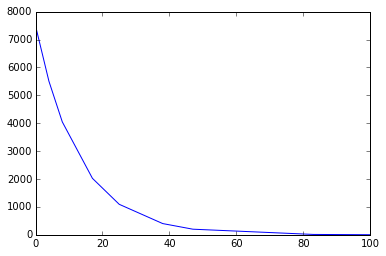

In [5]:
plt.plot(data[:,0], data[:,1])
plt.show()

...then on a three-cycle, semi-log graph...

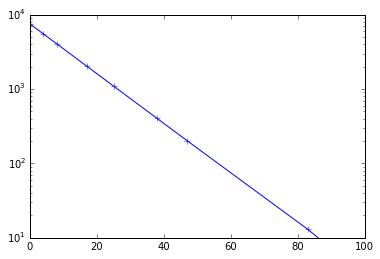

In [79]:
plt.plot(data[:,0], data[:,1], 'b+-')
plt.yscale('log')
plt.ylim(10,1e4)
plt.show()

Calculate the slope...

In [22]:
m = np.polyfit(data[:,0], np.log10(data[:,1]),1)[0]
m

-0.033713230060329169

...then $\lambda$ in reciprocal days...

In [59]:
l = m / -0.434
display(Math(r"{:.4G} d^{{-1}}".format(l)))

<IPython.core.display.Math object>

...then T in days...

In [60]:
T = np.log(2.) / l
display(Math(r"{:.4G} d".format(T)))

<IPython.core.display.Math object>

Calculate $\lambda$ in reciprocal seconds...

In [61]:
l_sec = l/24./60./60.
display(Math(r"{:.4G} s^{{-1}}".format(l_sec)))

<IPython.core.display.Math object>

...and T in years

In [65]:
T_yr = T / 365.241
display(Math(r"{:.4G} y".format(T_yr)))

<IPython.core.display.Math object>

## Problem B

Consider these data for the decay of a nuclide: (see below). Plot the data and ascertain the half-life in days

In [66]:
data_b = np.array([
        [0.0, 8977],
        [1, 7549],
        [2, 6348],
        [3, 5338],
        [4, 4489],
        [5, 3775],
        [6, 3174],
        [7, 2669]
    ])

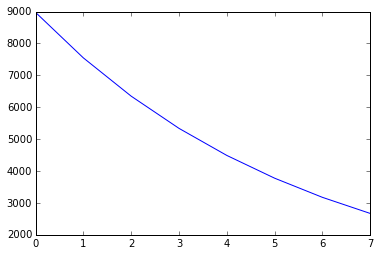

In [67]:
plt.plot(data_b[:,0], data_b[:,1])
plt.show()

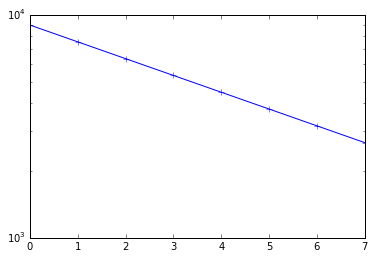

In [77]:
plt.plot(data_b[:,0], data_b[:,1], 'b+-')
plt.yscale('log')
plt.show()

In [72]:
m_b = np.polyfit(data_b[:,0], np.log10(data_b[:,1]),1)[0]
m_b

-0.075253332439731688

In [75]:
l_b = m_b / -0.434
T_b = np.log(2.) / l_b
display(Math(r"{:.4G} d".format(T_b)))

<IPython.core.display.Math object>

## Problem C

The T of $^{65}$Zn is 245 d. Starting with 14000 d/m, calculate the activity after 71d, 163d, 491d, 4y.

In [80]:
def activity(t, initial=14000, half_life=245):
    l = np.log(2) / half_life
    return initial * np.exp(-l * t)

In [95]:
time_array = np.array([71, 163, 491, 4 * 365.241])
print("{} (d/m)".format(activity(time_array)))

[ 11452.2487244    8827.7685173    3490.1118916     224.41430624] (d/m)


## Problem D

The T of $^{100}$Rh is 20.0 h. Suppose you have 16740 d/m. What had the d/m been back at 9h, 17h, 43h, 98h?

In [88]:
time_array_d = np.array([-9, -14, -43, -98])

In [94]:
print("{} (d/m)".format(activity(time_array_d, 16740, 20)))

[  22867.51389807   27194.21023001   74296.77184966  499807.11290644] (d/m)


## Problem E

The T of $^{24}$Na is 15h. How long will it take an activity of 10000 d/m to drop to 4716 d/m, 735 d/m, 0.5 d/m?

In [92]:
from __future__ import division
def decay_time(initial, final, half_life):
    l = np.log(2) / half_life
    return -(1. / l) * np.log(final / initial)

In [96]:
final_activity_e = np.array([4716, 735, 0.5])
print("{} (h)".format(decay_time(10000, final_activity_e, 15)))

[  16.26546565   56.4916791   214.31568569] (h)


## Problem F

Nine grams of NdF$_3$, $^{144}$Nd, give 6 c/m with a 40% efficient detector. Calculate T in y.

In [113]:
activity_f = 6 / 0.4
print(activity_f)
mass_Nd_144 = 143.9100873
mass_F = 18.998440

15.0


In [114]:
number_of_particles_f = 9. / (mass_Nd_144 + mass_F) * 6.022e23

$A=\lambda N$, $T=\frac{\ln2}{\lambda}$

In [115]:
half_life_in_minutes = np.log(2.) / (activity_f / number_of_particles_f)
half_life_in_minutes

1.5373531602720436e+21

Convert from minutes to years

In [116]:
half_life_in_years = half_life_in_minutes / 60. / 24. / 365.241
print("{:4G}".format(half_life_in_years))

2.92302E+15


## Problem G

Plot a secular equilibrium graph for the first two members of the $^{237}$Np series.

In [119]:
def activity_g_np(t, initial=1e5, half_life=2.144e6):
    l = np.log(2) / half_life
    return initial * np.exp(-l * t)

def activity_g_pa(t, initial=0, half_life=26.975/365.241):
    l = np.log(2) / half_life
    a = activity_g_np(t) * (1 - np.exp(-l * t))
    return a

def activity_g_total(t):
    return activity_g_np(t) + activity_g_pa(t)

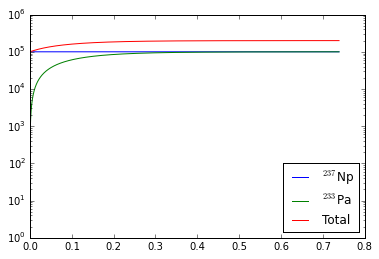

In [124]:
t_range = np.linspace(0,10*26.975/365.241,1e5)
plt.plot(t_range, activity_g_np(t_range), label=r'$^{237}$Np')
plt.plot(t_range, activity_g_pa(t_range), label=r'$^{233}$Pa')
plt.plot(t_range, activity_g_total(t_range), label='Total')
plt.yscale('log')
plt.legend(loc="lower right")
plt.show()

## Problem H

Look up an appropriate decay chain and plot a transient equilibrium diagram.

The decay of $^{140}$Ba (T=12.8d) to $^{140}$La (T=40h)

In [142]:
def activity_h_ba(t, initial=1e5, half_life=12.8):
    l = np.log(2) / half_life
    return initial * np.exp(-l * t)

def activity_h_la(t, initial=0, half_life=40./24):
    l_d = np.log(2) / half_life
    l_p = np.log(2) / (12.8)
    a_1 = l_d / (l_d - l_p) * 1e5
    a_2 = (np.exp(-l_p * t) - np.exp(-l_d * t))
    return a_1 * a_2

def activity_h_total(t):
    return activity_h_ba(t) + activity_h_la(t)

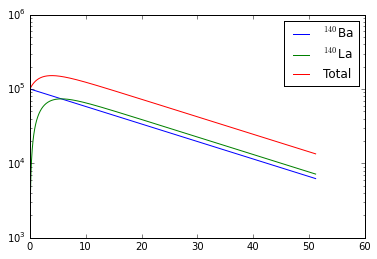

In [159]:
t_range = np.linspace(0,12.8*4,1e5)
plt.plot(t_range, activity_h_ba(t_range), label=r'$^{140}$Ba')
plt.plot(t_range, activity_h_la(t_range), label=r'$^{140}$La')
plt.plot(t_range, activity_h_total(t_range), label="Total")
plt.yscale('log')
plt.ylim(1e3,1e6)
plt.legend(loc='upper right')
plt.show()

## Problem I

Look up an appropriate decay chain and plot a no equilibrium diagram

The decay of $^{131}$Te (T=25.0 m) to $^{131}$I (T=8.02070 d)

In [183]:
def activity_i_te(t, initial=1e5, half_life=25.0):
    l = np.log(2) / half_life
    return initial * np.exp(-l * t)

def activity_i_i(t, initial=0, half_life=8.02070*24*60):
    l_d = np.log(2) / half_life
    l_p = np.log(2) / (25.0)
    a_1 = l_d / (l_d - l_p) * 1e5
    a_2 = (np.exp(-l_p * t) - np.exp(-l_d * t))
    return a_1 * a_2

def activity_i_total(t):
    return activity_i_te(t) + activity_i_i(t)

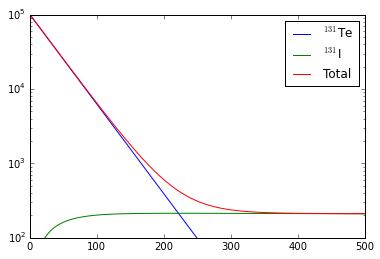

In [186]:
t_range = np.linspace(0,500,1e5)
plt.plot(t_range, activity_i_te(t_range), label=r'$^{131}$Te')
plt.plot(t_range, activity_i_i(t_range), label=r'$^{131}$I')
plt.plot(t_range, activity_i_total(t_range), label="Total")
plt.yscale('log')
plt.ylim(1e2,1e5)
plt.legend(loc='upper right')
plt.show()